In [1]:
import sys; sys.path.append('..')
import warnings; warnings.simplefilter("ignore")
import pandas as pd

In [2]:
user_df = pd.read_csv('../data/Books/Users.csv')

In [3]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
user_df = pd.concat([user_df, user_df["Location"].str.split(', ', expand=True)], axis=1)
drop_cols = ["Location", 3,4,5,6,7,8]
user_df = user_df.drop(drop_cols, axis=1)
user_df = user_df.rename(columns={0: "city", 1: "state", 2: "country"})
user_df.head()

,User-ID,Age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


<AxesSubplot:>

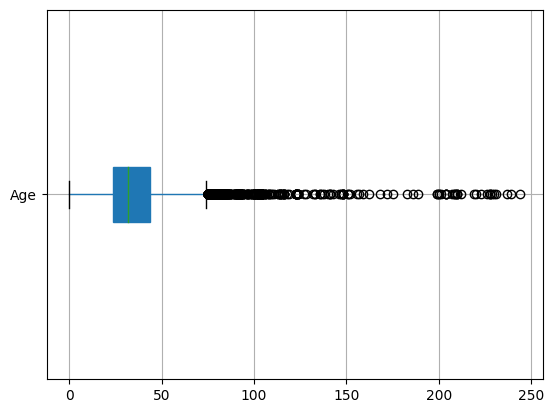

In [5]:
user_df.boxplot(column="Age", vert=False, patch_artist=True)

In [6]:
# 年齢がえらいことになっている。登録時の打ち間違え？
import numpy as np

len_user = len(user_df)
len_user_over_100 =  len(user_df[user_df["Age"] > 100])
len_user_age_is_nan = user_df["Age"].isnull().sum()

print(f"ユーザの数:　　{len_user}")
print(f'100歳以上のレコード数: {len_user_over_100}')

print(f'AgeがNanのレコード数: {len_user_age_is_nan}')
print(f'正しくAgeが入力されているとされるレコードの割合: {(len_user-(len_user_over_100+len_user_age_is_nan))/len_user:.2f}')


ユーザの数:　　278858
100歳以上のレコード数: 366
AgeがNanのレコード数: 110762
正しくAgeが入力されているとされるレコードの割合: 0.60


In [7]:
# 国ごとのユーザ数
user_df.groupby("country").agg({"User-ID": np.sum})

,User-ID
country,
,440721
australia,275708
england,227693
pasig city.,261732
&#20013;&#22269;,272827
...,...
zhengjiang,23884
zimbabwe,3481123
álava,23325


In [8]:
user_df[-1:]["state"].to_list()

['n/a']

In [9]:
len_state_nan = len(user_df[user_df["state"]== "n/a"])
len_city_nan = len(user_df[user_df["city"]== "n/a"])
len_country_nan = len(user_df[user_df["country"]== "n/a"])

print(f"欠損値の数")
print(f'state: {len_state_nan}')
print(f'city: {len_city_nan}')
print(f'country: {len_country_nan}')

欠損値の数
state: 12421
city: 439
country: 78


In [10]:
# stateがわかっていてcountryがわからない場合などは場合によって欠損値を埋めれる??
temp_df = user_df[~((user_df["city"]=="n/a") & (user_df["state"]=="n/a"))]
city_state_country = len(temp_df[temp_df["country"]=="n/a"])

# cityはわかるがstateがわからない場合
city_state = len(user_df[(user_df["city"]!="n/a") & (user_df["state"]=="n/a")])

# すべてがわからない
temp_df = user_df[(user_df["city"]=="n/a") & (user_df["state"]=="n/a")]
all_na = len(temp_df[temp_df["country"]=="n/a"])

# stateはnew yorkなのにcountryはusaではないレコードが存在するから、countryだけを考慮すればいいかな
error_recode = len(user_df[(user_df["state"]=="new york") & (user_df["country"]!="usa")])

print(f"cityはわかるがstateがわからないレコード数: {city_state}")
print(f'cityまたは、stateがわかっていてcountryがわからないレコード数: {city_state_country}')
print(f'すべてがわからないレコード数: {all_na}')
print(f'stateはnew yorkなのにcountryはusaではないレコード数: {error_recode}')


cityはわかるがstateがわからないレコード数: 12150
cityまたは、stateがわかっていてcountryがわからないレコード数: 67
すべてがわからないレコード数: 11
stateはnew yorkなのにcountryはusaではないレコード数: 82


In [11]:
# Locationは欠損値を埋めれる？？

In [12]:
book_df = pd.read_csv('../data/Books/Books.csv')
book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
print(f"レコード数: {len(book_df)}")

レコード数: 271360


In [40]:
# 同じ名前の本があるという紛らわしいこと
book_df.groupby('Book-Title').size().sort_values(ascending=False)

Book-Title
Selected Poems                             27
Little Women                               24
Wuthering Heights                          21
Dracula                                    20
Adventures of Huckleberry Finn             20
                                           ..
Hinds Feet On High Places                   1
Hinds Feet on High Places                   1
Hinds Feet on High Places Women             1
Hindsight: A Novel of the Class of 1972     1
Ã?Â?thique en toc                           1
Length: 242135, dtype: int64

In [16]:
book_df.groupby("Year-Of-Publication").size()

Year-Of-Publication
0                    3570
1806                    1
1900                    1
1901                    7
1902                    2
                     ... 
2024                    1
2030                    3
2037                    1
DK Publishing Inc       2
Gallimard               1
Length: 202, dtype: int64

(1970.0, 2010.0)

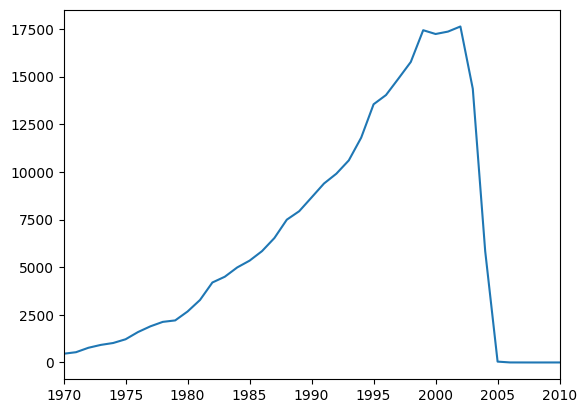

In [68]:
# 西暦ではない後ろの２つは、履歴と一緒にあとで消す、とする。0もどうにかする。
import matplotlib.pyplot as plt
%matplotlib inline

temp_df = book_df[(book_df["Year-Of-Publication"]!="DK Publishing Inc") & (book_df["Year-Of-Publication"]!="Gallimard")]
temp_df = temp_df.astype({"Year-Of-Publication": int})
temp_df = temp_df[temp_df["Year-Of-Publication"]!=0]

pub_dict = temp_df.groupby("Year-Of-Publication").size().to_dict()

figure, ax = plt.subplots()
x = pub_dict.keys()
y = pub_dict.values()
ax.plot(x,y)
ax.set_xlim([1970,2010])
                                               

In [15]:
rating_df = pd.read_csv('../data/Books/Ratings.csv')
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
